Assignment # 3 Hadoop & Spark

In [33]:
'''
Part 2 - Dijkstra's Shortest Path

basic Dijkstra’s shortest path algorithm
Input File: question1.txt
First column - Initial Node
Second Column - Destination Node
Third Column - Weight for the connection (Distance) 

Algorithm;
Read txt file
compute the shortest path from Node 0 to Node 4
Print the value

create a 'output_1.txt' file 
store shortest distances to all the nodes
'''

"\nPart 2 - Dijkstra's Shortest Path\n\nbasic Dijkstra’s shortest path algorithm\nInput File: question1.txt\nFirst column - Initial Node\nSecond Column - Destination Node\nThird Column - Weight for the connection (Distance) \n\nAlgorithm;\nRead txt file\ncompute the shortest path from Node 0 to Node 4\nPrint the value\n\ncreate a 'output_1.txt' file \nstore shortest distances to all the nodes\n"

In [34]:
''' Dijkstra's shortest path '''
import heapq

def dijk_short_path(graph, start):
    # Create a priority queue and a dictionary to store the shortest path to each node
    queue = [(0, start)]
    shortest_paths = {start: (None, 0)}
    
    while queue:
        (current_distance, current_node) = heapq.heappop(queue)
        
        for neighbor, weight in graph.get(current_node, []):
            distance = current_distance + weight
            
            if neighbor not in shortest_paths or distance < shortest_paths[neighbor][1]:
                shortest_paths[neighbor] = (current_node, distance)
                heapq.heappush(queue, (distance, neighbor))
    
    return shortest_paths

def read_edges_from_file(file_path):
    edges = []
    with open(file_path, 'r') as file:
        for line in file:
            src, dest, weight = map(int, line.split(','))
            edges.append((src, dest, weight))
    return edges

def write_distances_to_file(distances, file_path):
    with open(file_path, 'w') as file:
        for node, (_, dist) in distances.items():
            file.write(f"Node {node}: {dist}\n")

def main():
    # Read the edges from the input file
    input_file = 'question1.txt'
    edges = read_edges_from_file(input_file)
    
    # Convert the edges into an adjacency list
    graph = {}
    for src, dest, weight in edges:
        if src not in graph:
            graph[src] = []
        graph[src].append((dest, weight))

    # Compute the shortest paths from the start node
    start_node = 0
    end_node = 4
    shortest_paths = dijk_short_path(graph, start_node)

    # Print the shortest path from start_node to end_node
    print(f"Shortest path from node {start_node} to node {end_node}: {shortest_paths[end_node][1]}")

    # Write distances to all nodes to the output file
    output_file = 'output_1.txt'
    write_distances_to_file(shortest_paths, output_file)

if __name__ == '__main__':
    main()


Shortest path from node 0 to node 4: 3


In [35]:
import findspark
findspark.init()

In [36]:
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .master ('local') \
    .appName("pagerank") \
    .getOrCreate()
sc=spark.sparkContext

In [37]:
#Read the file 
file_path = "question2.txt"
with open(file_path, 'r') as file:
    lines = file.readlines()


network = {}
for i, line in enumerate(lines):
    links = line.strip()[3:-1].split(', ')
    

    links = [(int(link.replace("[", "")) if not link.isdigit() else int(link)) for link in links]


    
    network[i] = links
print("network:", network)

network: {0: [56, 35, 47, 31, 62, 33, 72, 94], 1: [76, 82, 44, 36, 20, 34, 11, 94, 50, 45], 2: [9, 75, 64, 23], 3: [37], 4: [34, 24], 5: [66], 6: [27, 79, 87], 7: [2, 38, 84, 21, 24, 58, 16, 81, 56, 10], 8: [98], 9: [89, 82, 63, 35, 10], 10: [34, 51, 95], 11: [64, 50, 3, 78, 0, 30, 85], 12: [4, 16, 93, 94, 87, 83, 51], 13: [60, 89, 29, 2, 6, 92, 35], 14: [85, 5, 78, 62, 19, 27, 76], 15: [21, 11, 81, 52, 56, 51, 80], 16: [53, 65, 24, 84, 77, 42, 17, 52, 49], 17: [13, 11, 46, 23, 30, 87, 68, 12], 18: [70, 93, 45, 65, 17, 46, 10], 19: [54], 20: [60, 42, 69, 52, 34, 57, 37], 21: [58, 76, 81, 63, 85, 93, 31], 22: [93], 23: [91, 84, 17, 50, 95, 29, 27], 24: [66, 27, 51, 97, 30, 67], 25: [89, 62, 46, 49, 0, 9, 19, 5, 84], 26: [7, 68, 10, 62, 30, 57, 49, 32, 71, 11], 27: [98, 31, 5, 56, 93], 28: [81, 78, 40, 53, 93], 29: [25, 1, 76, 26, 36, 17, 14, 97], 30: [70, 56, 11, 7, 32, 48, 47], 31: [1, 92, 6, 42, 46, 99, 22, 74, 11], 32: [75, 50, 44, 28, 36, 66], 33: [13, 14], 34: [12, 19, 22, 36, 73, 

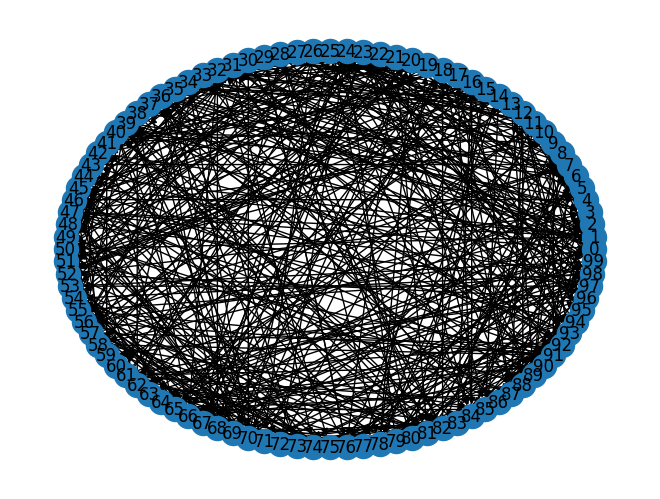

In [38]:
import networkx as nx
link_graph = nx.DiGraph(network)
labels = dict((n, str(n)) for n in link_graph.nodes())
nx.draw_circular(link_graph, labels = labels)

In [39]:
ranks = sc.parallelize(network.keys()).map(lambda x : (x, 1))

links = sc.parallelize(network.items()).cache()

sorted(links.join(ranks).collect())


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pyspark/python/lib/pyspark.zip/pyspark/shuffle.py:65: UserWarning: Please install psutil to have better support with spilling
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pyspark/python/lib/pyspark.zip/pyspark/shuffle.py:65: UserWarning: Please install psutil to have better support with spilling


[(0, ([56, 35, 47, 31, 62, 33, 72, 94], 1)),
 (1, ([76, 82, 44, 36, 20, 34, 11, 94, 50, 45], 1)),
 (2, ([9, 75, 64, 23], 1)),
 (3, ([37], 1)),
 (4, ([34, 24], 1)),
 (5, ([66], 1)),
 (6, ([27, 79, 87], 1)),
 (7, ([2, 38, 84, 21, 24, 58, 16, 81, 56, 10], 1)),
 (8, ([98], 1)),
 (9, ([89, 82, 63, 35, 10], 1)),
 (10, ([34, 51, 95], 1)),
 (11, ([64, 50, 3, 78, 0, 30, 85], 1)),
 (12, ([4, 16, 93, 94, 87, 83, 51], 1)),
 (13, ([60, 89, 29, 2, 6, 92, 35], 1)),
 (14, ([85, 5, 78, 62, 19, 27, 76], 1)),
 (15, ([21, 11, 81, 52, 56, 51, 80], 1)),
 (16, ([53, 65, 24, 84, 77, 42, 17, 52, 49], 1)),
 (17, ([13, 11, 46, 23, 30, 87, 68, 12], 1)),
 (18, ([70, 93, 45, 65, 17, 46, 10], 1)),
 (19, ([54], 1)),
 (20, ([60, 42, 69, 52, 34, 57, 37], 1)),
 (21, ([58, 76, 81, 63, 85, 93, 31], 1)),
 (22, ([93], 1)),
 (23, ([91, 84, 17, 50, 95, 29, 27], 1)),
 (24, ([66, 27, 51, 97, 30, 67], 1)),
 (25, ([89, 62, 46, 49, 0, 9, 19, 5, 84], 1)),
 (26, ([7, 68, 10, 62, 30, 57, 49, 32, 71, 11], 1)),
 (27, ([98, 31, 5, 56, 9

In [40]:
g = nx.DiGraph(network)
pagerrank = nx.pagerank(g)
# print(pagerrank)
nx.pagerank(g)

{0: 0.012160285443639066,
 1: 0.013187601801606687,
 2: 0.006967688934015383,
 3: 0.01488917523869415,
 4: 0.005972457974411663,
 5: 0.017044957308540405,
 6: 0.008108996639744273,
 7: 0.009626112395495476,
 8: 0.00633172431325637,
 9: 0.007507484195803872,
 10: 0.006016009406713074,
 11: 0.010018117725960911,
 12: 0.011466234888341264,
 13: 0.010746369520638264,
 14: 0.014562447235831093,
 15: 0.0024124543106796527,
 16: 0.01190350854660617,
 17: 0.0069494773183577,
 18: 0.009563332165787267,
 19: 0.008037798341992168,
 20: 0.015836625940234647,
 21: 0.00330781544723181,
 22: 0.01495000108516041,
 23: 0.013450530166227588,
 24: 0.009445299165430313,
 25: 0.003861713599255236,
 26: 0.006220560425888571,
 27: 0.010694388947296485,
 28: 0.0031579441784085243,
 29: 0.006922793299969498,
 30: 0.009302623134675378,
 31: 0.026092835797286783,
 32: 0.004753763351622853,
 33: 0.01561895260533062,
 34: 0.01341778869456717,
 35: 0.005924621283119442,
 36: 0.012571607887022742,
 37: 0.01882235427

In [41]:

highest_page = max(pagerrank, key=pagerrank.get)
lowest_page = min(pagerrank, key=pagerrank.get)

print("Highest Pagerank:", highest_page)
print("Lowest Pagerank:", lowest_page)

Highest Pagerank: 31
Lowest Pagerank: 80


In [42]:
spark